# Two-Body Simulation, Observed from a Fixed Center of Mass

**Importing modules**

In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np

**Initialize positions and velocities**

In [1]:
posA = [0,0,0]
posB = [1.12,0,0]

posA = np.array(posA, dtype="float64")
posB = np.array(posB, dtype="float64")

velA = [0.01,0.01,0]
velB = [-0.05,0,-0.1]

velA = np.array(velA, dtype="float64")
velB = np.array(velB, dtype="float64")

NameError: name 'np' is not defined

**Declare constants and scale-down constants**

In [3]:
#Define universal gravitational constant
G=6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#mass of the bodies
mA = 1.1
mB = 0.907

K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

**Setting up equation of motions**

In [4]:
def twobodyequations(derivarray,t,G,mA,mB):
    posA = derivarray[:3]
    posB = derivarray[3:6]
    velA = derivarray[6:9]
    velB = derivarray[9:12]
    
    r = np.linalg.norm(posA-posB)
    
    dvelAdt = K1*mB*(posB-posA)/r**3
    dvelBdt = K1*mA*(posA-posB)/r**3
    dposAdt = K2*velA
    dposBdt = K2*velB
    
    rDerivs = np.concatenate((dposAdt, dposBdt))
    derivs = np.concatenate((rDerivs, dvelAdt, dvelBdt))
    return derivs

**Initial conditions**

In [5]:
initParams = np.array([posA,posB,velA,velB])
initParams = initParams.flatten()
timeSpan = np.linspace(0,20,1200)

**ODE solver**

In [6]:
import scipy.integrate

twobodysol = scipy.integrate.odeint(twobodyequations, initParams, timeSpan, args = (G,mA,mB))
posAsol = twobodysol[:,:3]
posBsol = twobodysol[:,3:6]

**Compute position of center of mass**

In [7]:
posCOMsol = (mA*posAsol + mB*posBsol)/(mA+mB)
posACOMsol = posAsol - posCOMsol
posBCOMsol = posBsol - posCOMsol

**Plot output**

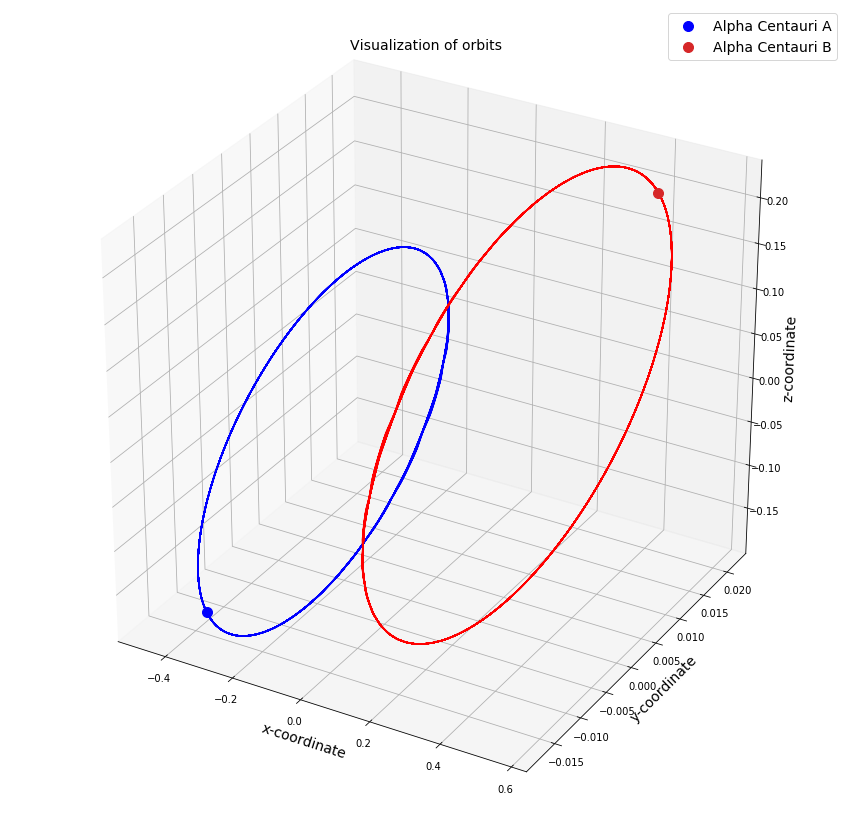

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection = "3d")

#oposBit plot
ax.plot(posACOMsol[:,0], posACOMsol[:,1], posACOMsol[:,2], color = "blue")
ax.plot(posBCOMsol[:,0], posBCOMsol[:,1], posBCOMsol[:,2], color = "red")

#final position plot
ax.scatter(posACOMsol[-1,0], posACOMsol[-1,1], posACOMsol[-1,2], color = "blue", marker = "o", s=100, label = "Alpha Centauri A")
ax.scatter(posBCOMsol[-1,0], posBCOMsol[-1,1], posBCOMsol[-1,2], color = "red", marker = "o", s=100, label = "Alpha Centauri B")

#add more details
ax.set_xlabel("x-coordinate", fontsize = 14)
ax.set_ylabel("y-coordinate", fontsize = 14)
ax.set_zlabel("z-coordinate", fontsize = 14)
ax.set_title("Visualization of orbits\n", fontsize = 14)
ax.legend(loc="upper right", fontsize = 14)